リング計算をするサンプル

In [1]:
import os, sys
sys.path.append(os.path.join(os.path.dirname('__file__'), '..'))
from IPython.display import Image

In [2]:
from core.file import File
from computation.rings import RINGs

cifファイルからAtomsクラスオブジェクトを生成

In [3]:
path = "../data/crystal/sio2_beta_cristobalite333.cif"
f = File.open(path)
atoms = f.getatoms()

RING計算するクラスRINGsのオブジェクトを生成

In [4]:
ring = RINGs(atoms)

GUTTMANタイプの計算。（GUTTMAN, KING, PRIMITIVE）から選択

In [5]:
rings = ring.calculate(ring_type=RINGs.RingType.GUTTMAN, 
                       pair_atom_symbols=[['Si', 'O']])

100%|█████████████████████████████████████████████████████████████████████████████████████| 864/864 [00:00<00:00, 1871.50it/s]


In [6]:
print("Number of rings : %i" % len(rings))

Number of rings : 432


In [7]:
# 0番目のリングを構成している原子インデックスの表示
print(rings[0])

[24, 32, 29, 41, 27, 180, 174, 183, 169, 613, 607, 616]


In [8]:
# RINGを構成しているときTrue, ChainのときFalse
print(rings[0].close)

True


In [9]:
# roundnessとroughnessの計算
print("roundness, roughness : %5f %5f" % (rings[0].roundness, rings[0].roughness))

roundness, roughness : 0.999996 0.188995


RINGが周期境界で構成しているか判別

index 2 : 周期的にリングを構成している

In [10]:
print(rings[2].over_boundary)

True


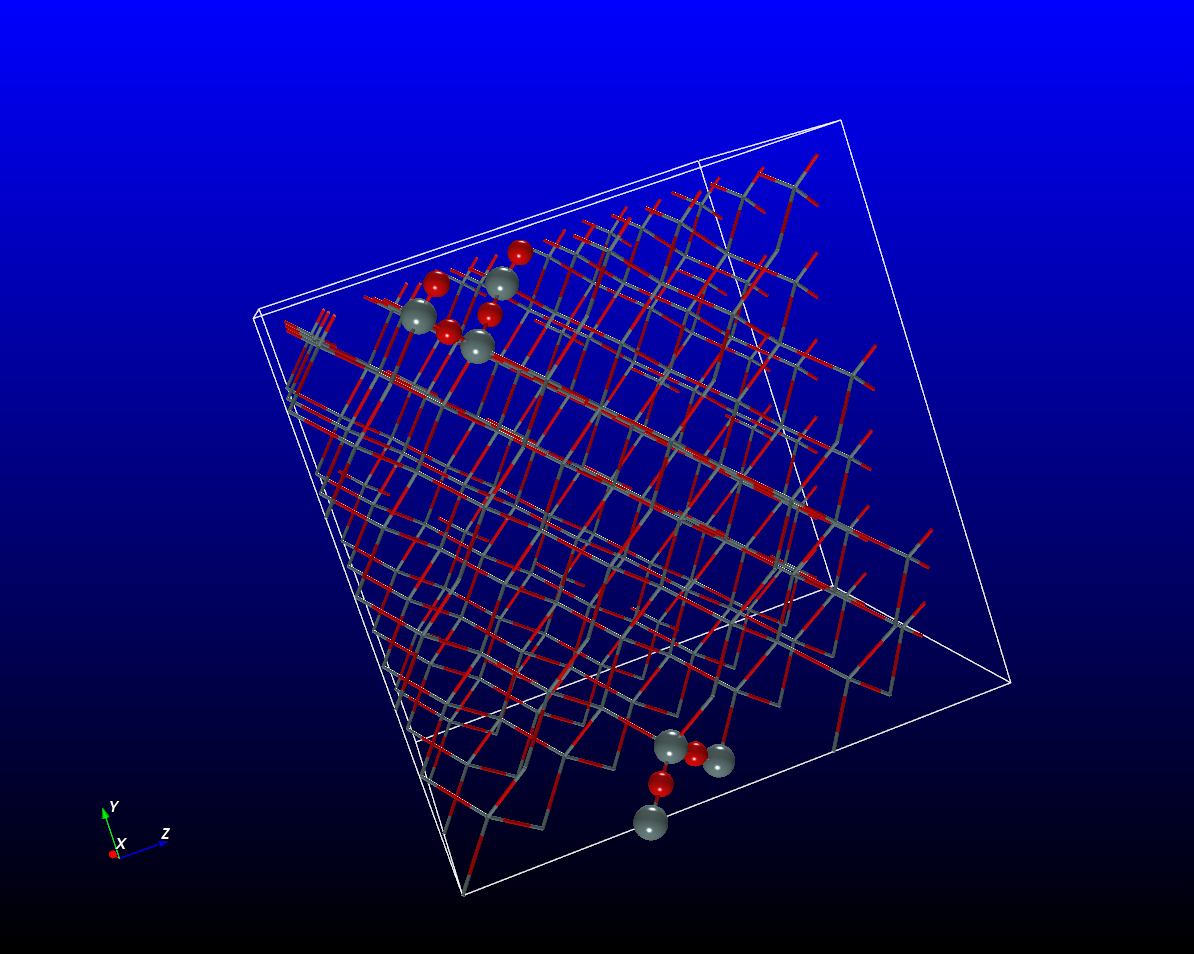

index 3 : セル内部でリングを構成している

In [11]:
print(rings[3].over_boundary)

False


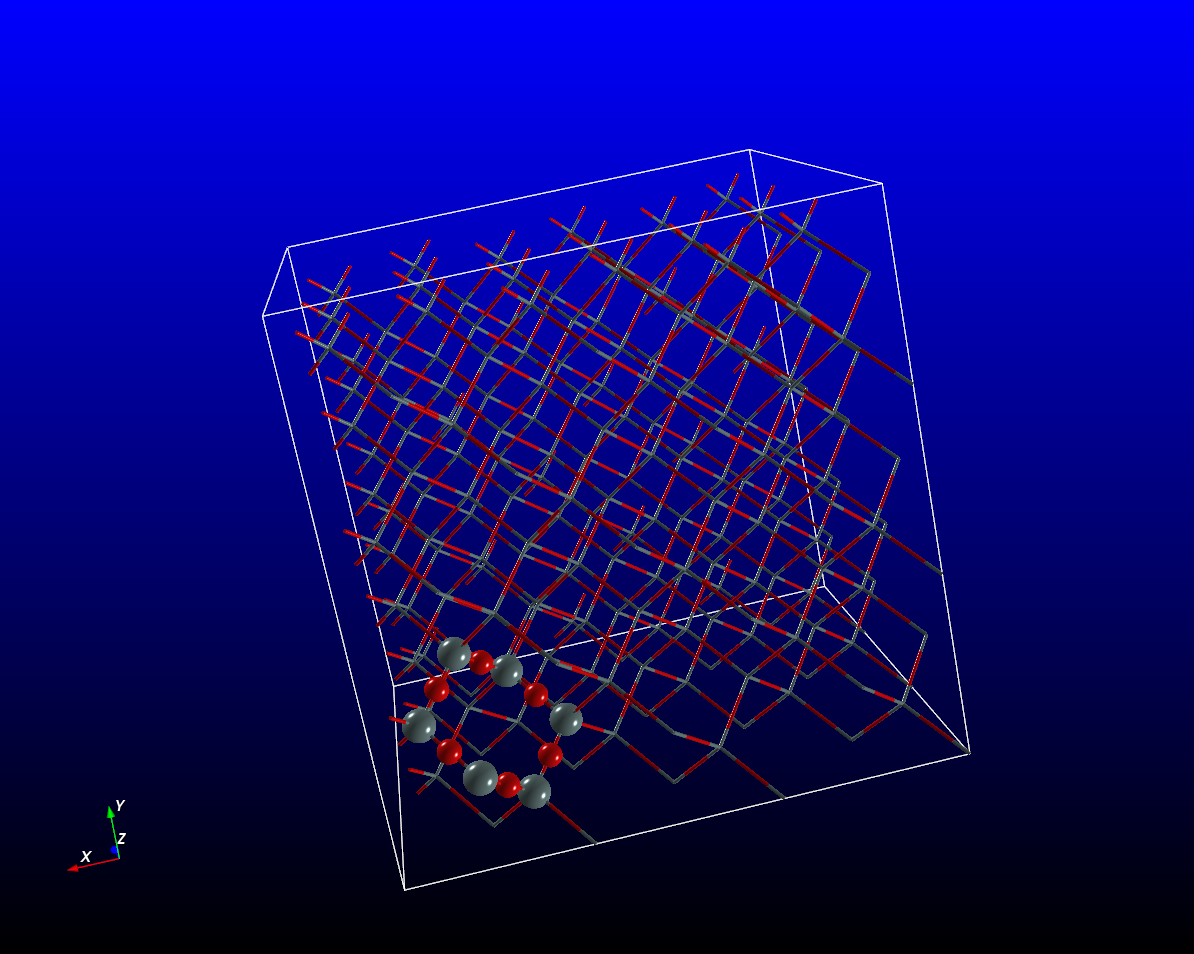

Chainが現れるときのサンプル

In [12]:
path = "../data/crystal/sio2_beta_cristobalite.cif"
f = File.open(path)
atoms = f.getatoms()

In [13]:
ring = RINGs(atoms)
rings = ring.calculate(ring_type=RINGs.RingType.GUTTMAN, 
                       pair_atom_symbols=[['Si', 'O']])

100%|███████████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 2359.71it/s]


In [14]:
# RINGを構成しているときTrue, ChainのときFalse
print(rings[0].close)

False
